# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [66]:
# # Here is a helping code that will download and unzip the dataset for you.
# # Once you download the dataset you may comment the code!
# !kaggle datasets download -d khaledzsa/traffic-dataset
# !unzip traffic-dataset.zip

In [67]:
import pandas as pd


In [87]:
df = pd.read_csv('/content/Traffic Data.csv',parse_dates=['date_time'])

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [88]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [89]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [90]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,date_time
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000,20000
mean,3278.186887,281.162680,0.048396,0.0,49.384600,2017-10-22 04:13:17.939999744
min,113.000000,243.390000,0.000000,0.0,0.000000,2016-11-18 15:00:00
25%,1228.750000,271.950000,0.000000,0.0,1.000000,2017-04-30 14:45:00
50%,3430.000000,281.825000,0.000000,0.0,75.000000,2017-10-21 07:30:00
75%,4928.000000,291.840000,0.000000,0.0,90.000000,2018-04-13 21:00:00
max,16781.000000,310.070000,10.600000,0.0,92.000000,2018-09-30 23:00:00
std,1977.171357,12.661288,0.398007,0.0,39.647341,NaN


In [91]:
df.fillna(3278.186887,inplace=True)

In [92]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   traffic_volume       20000 non-null  float64       
 1   temp                 20000 non-null  float64       
 2   rain_1h              20000 non-null  float64       
 3   snow_1h              20000 non-null  float64       
 4   clouds_all           20000 non-null  int64         
 5   weather_main         20000 non-null  object        
 6   weather_description  20000 non-null  object        
 7   date_time            20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.2+ MB


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [94]:
df['traffic_volume_shifted'] = df['traffic_volume'].shift(1)
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume_shifted
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,NaN
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0
...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0


In [95]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume_shifted,traffic_volume_diff
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,NaN,NaN
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0,39.0
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0,3354.0
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0,-1764.0
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0,2956.0
...,...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0,-3878.0
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0,3172.0
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0,-4763.0
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0,4393.0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   traffic_volume          20000 non-null  float64       
 1   temp                    20000 non-null  float64       
 2   rain_1h                 20000 non-null  float64       
 3   snow_1h                 20000 non-null  float64       
 4   clouds_all              20000 non-null  int64         
 5   weather_main            20000 non-null  object        
 6   weather_description     20000 non-null  object        
 7   date_time               20000 non-null  datetime64[ns]
 8   traffic_volume_shifted  19999 non-null  float64       
 9   traffic_volume_diff     19999 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 1.5+ MB


In [97]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['Day_of_week'] = df['date_time'].dt.dayofweek
df['Month'] = df['date_time'].dt.month
df['Day_of_year'] = df['date_time'].dt.dayofyear

In [98]:
df.reset_index().set_index('date_time')

,index,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume_shifted,traffic_volume_diff,Day_of_week,Month,Day_of_year
date_time,,,,,,,,,,,,,
2017-08-27 01:00:00,0,1209.0,291.15,0.0,0.0,90,Mist,mist,NaN,NaN,6,8,239
2018-09-06 23:00:00,1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,1209.0,39.0,3,9,249
2017-08-25 18:00:00,2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,1248.0,3354.0,4,8,237
2017-11-09 22:00:00,3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,4602.0,-1764.0,3,11,313
2017-11-09 15:00:00,4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2838.0,2956.0,3,11,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-06 21:00:00,19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,6601.0,-3878.0,2,6,157
2017-10-25 15:00:00,19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2723.0,3172.0,2,10,298
2018-03-28 23:00:00,19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,5895.0,-4763.0,2,3,87


TypeError: cannot do slice indexing on RangeIndex with these indexers [2018] of type str

In [84]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume_shifted,traffic_volume_diff,Day_of_week,Month,Day_of_year
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00,NaN,NaN,6,8,239
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00,1209.0,39.0,3,9,249
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00,1248.0,3354.0,4,8,237
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00,4602.0,-1764.0,3,11,313
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00,2838.0,2956.0,3,11,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00,6601.0,-3878.0,2,6,157
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00,2723.0,3172.0,2,10,298
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00,5895.0,-4763.0,2,3,87
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00,1132.0,4393.0,0,2,43


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [110]:
df = df.sort_index()

In [124]:
df.fillna(3278.186887,inplace=True)

In [125]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [135]:
new_df = df.reset_index()['traffic_volume']
new_df

,traffic_volume
0,4872.0
1,4872.0
2,4872.0
3,5074.0
4,5074.0
...,...
19995,3543.0
19996,2781.0
19997,2159.0
19998,1450.0


In [136]:
train_size = int(len(new_df) * 0.8)  # 80% for training
train_size

16000

In [137]:
train_data, test_data = new_df[:train_size], new_df[train_size:]

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data=scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data= scaler.transform(np.array(test_data).reshape(-1,1))
train_data, test_data

(array([[0.28551716],
        [0.28551716],
        [0.28551716],
        ...,
        [0.15688745],
        [0.10103192],
        [0.07841373]]),
 array([[0.04451644],
        [0.03155748],
        [0.02285817],
        ...,
        [0.12275018],
        [0.08021358],
        [0.05045596]]))

In [139]:
import numpy as np

n_past = 60


X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [140]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [141]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout, GRU

In [142]:
RNN_model = Sequential()

RNN_model.add(SimpleRNN(units=50, return_sequences = True, input_shape = (X_train.shape[1],1)))
RNN_model.add(Dropout(0.2))

RNN_model.add(SimpleRNN(units=50, return_sequences = True))
RNN_model.add(Dropout(0.2))

RNN_model.add(SimpleRNN(units=50))
RNN_model.add(Dropout(0.2))

RNN_model.add(Dense(units = 1))
RNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
RNN_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [145]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [147]:

checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = RNN_model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=20,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - loss: 0.0013 - val_loss: 8.8885e-04
Epoch 2/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 3/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - loss: 0.0012 - val_loss: 9.9846e-04
Epoch 4/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 5/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - loss: 0.0012 - val_loss: 7.7490e-04
Epoch 6/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - loss: 0.0012 - val_loss: 7.6951e-04
Epoch 7/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - loss: 0.0011 - val_loss: 8.6852e-04
Epoch 8/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 51s 74ms/step - loss: 0.0011 - val_loss: 9.1012e-04
Epoch 9/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - loss: 0.0011 - val_loss: 7.8695e-04
Epoch 10/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - loss: 0.0012 - val_loss: 8.1101e-04
Epoch 11/20
499/499 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - loss: 0.0012 - val_loss: 7.823

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [148]:
train_predict=RNN_model.predict(X_train)
test_predict=RNN_model.predict(X_test)

499/499 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


In [149]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [150]:
import math
from sklearn.metrics import mean_squared_error

In [151]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
# Calculate test data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

3853.5778377189586
3918.8719079032544


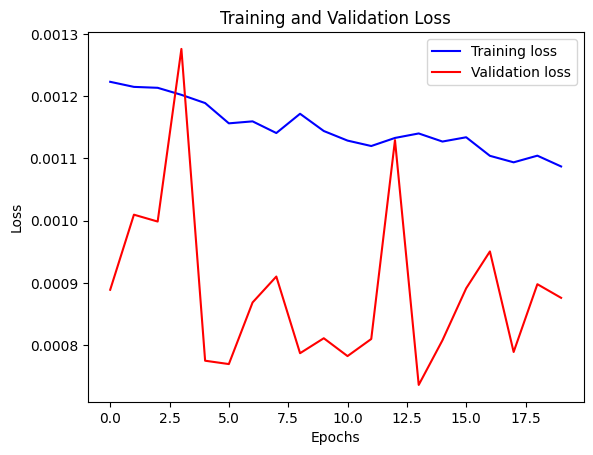

In [152]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

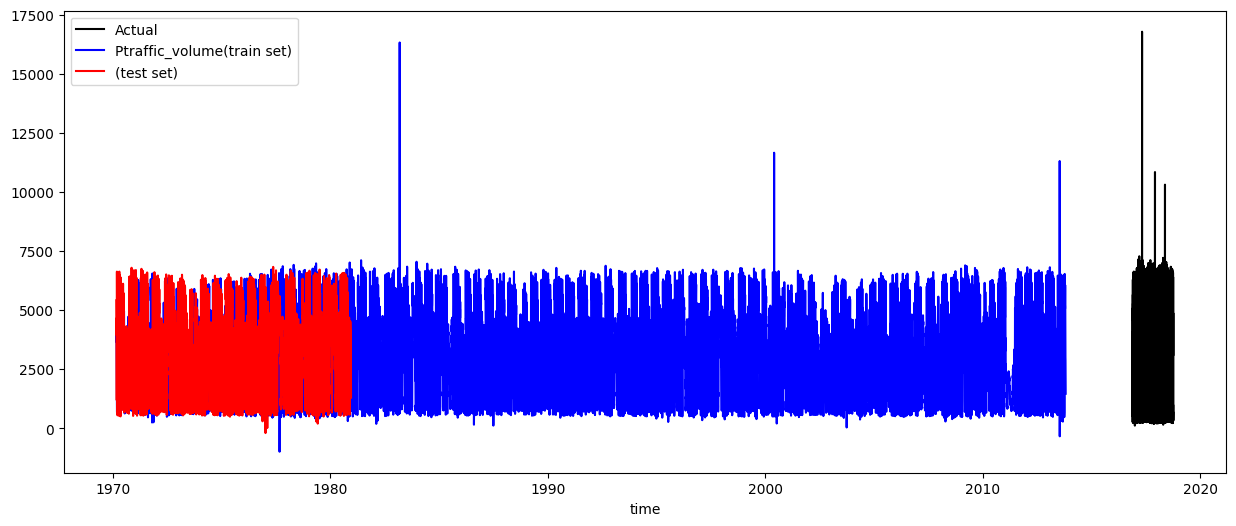

In [162]:

look_back = 60


trainPredictPlot = np.empty_like(train_data)
trainPredictPlot[:] = np.nan

trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict.flatten().reshape(-1,1)


testPredictPlot = np.empty_like(test_data)
testPredictPlot[:] = np.nan
test_start = len(test_data) - len(test_predict)

testPredictPlot[test_start:] = test_predict.flatten().reshape(-1,1)

original_scaled_data = df["traffic_volume"][:]


plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual")
plt.plot(trainPredictPlot, color='blue', label=f"traffic_volume(train set)")
plt.plot(testPredictPlot, color='red', label=f"(test set)")

plt.title(f"")
plt.xlabel("time")
plt.ylabel(f"")
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [154]:
regressor = Sequential()


regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))


regressor.add(Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [155]:
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

In [163]:
history = RNN_model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=5,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - loss: 0.0011 - val_loss: 8.3901e-04
Epoch 2/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 0.0011 - val_loss: 7.5340e-04
Epoch 3/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - loss: 0.0010 - val_loss: 7.9899e-04
Epoch 4/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - loss: 0.0013 - val_loss: 8.0865e-04
Epoch 5/5
499/499 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - loss: 0.0011 - val_loss: 8.0316e-04


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [164]:
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

499/499 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step


In [165]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [166]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
# Calculate test data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

3682.6781696865664
3716.058434321403


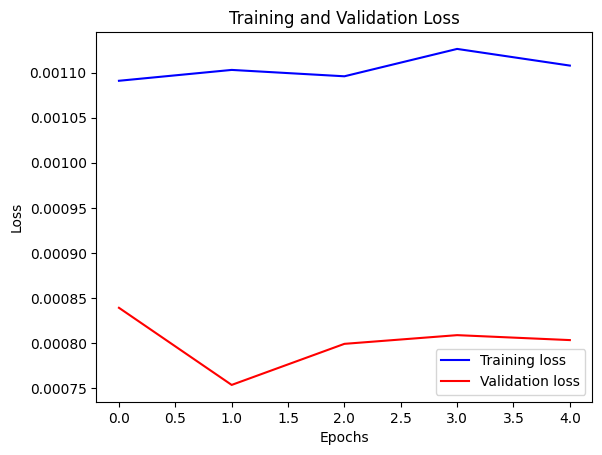

In [167]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

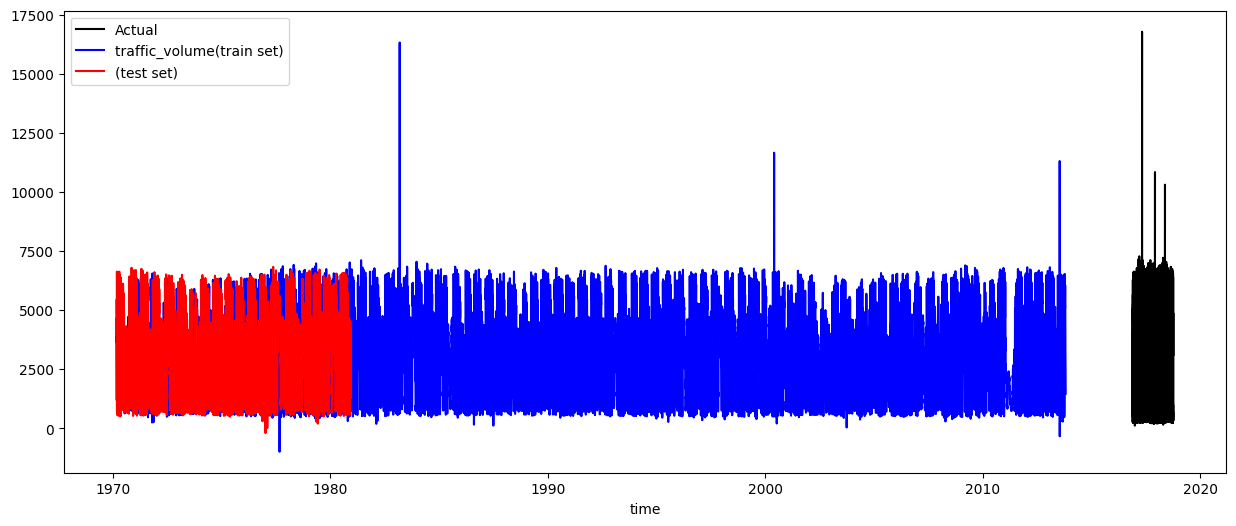

In [168]:

look_back = 60


trainPredictPlot = np.empty_like(train_data)
trainPredictPlot[:] = np.nan

trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict.flatten().reshape(-1,1)


testPredictPlot = np.empty_like(test_data)
testPredictPlot[:] = np.nan
test_start = len(test_data) - len(test_predict)

testPredictPlot[test_start:] = test_predict.flatten().reshape(-1,1)

original_scaled_data = df["traffic_volume"][:]


plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual")
plt.plot(trainPredictPlot, color='blue', label=f"traffic_volume(train set)")
plt.plot(testPredictPlot, color='red', label=f"(test set)")

plt.title(f"")
plt.xlabel("time")
plt.ylabel(f"")
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: